In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mahirkukreja_delhi_weather_data_path = kagglehub.dataset_download('mahirkukreja/delhi-weather-data')

print('Data source import complete.')


## Weather forecasting using LSTM

#### In this project we are going to use weather dataset for time series forecasting and we are predicting future 30 days weather by using LSTM

Time series analysis is a statistical method to analyse the past data within a given duration of time to forecast the future. It comprises of ordered sequence of data at equally spaced interval.To understand the time series data & the analysis let us consider an example. Consider an example of Airline Passenger data. It has the count of passenger over a period of time.



In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [4]:
df= pd.read_csv('testset.csv')
df.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [6]:
data

,temp
datetime_utc,
19961101-11:00,30.0
19961101-12:00,28.0
19961101-13:00,24.0
19961101-14:00,24.0
19961101-16:00,23.0
...,...
20170424-06:00,34.0
20170424-09:00,38.0
20170424-12:00,36.0


Now we are using only data for 365 days

In [7]:
df=data[:365]

In [8]:
df.shape

(365, 1)

In [9]:
df.isnull().sum()

,0
temp,3


In [10]:
df=df.dropna(axis=0)

In [11]:
df.shape

(362, 1)

In [12]:
df=df['temp'].values

In [13]:
df[:5]

array([30., 28., 24., 24., 23.])

In [14]:
df=df.reshape(-1,1)

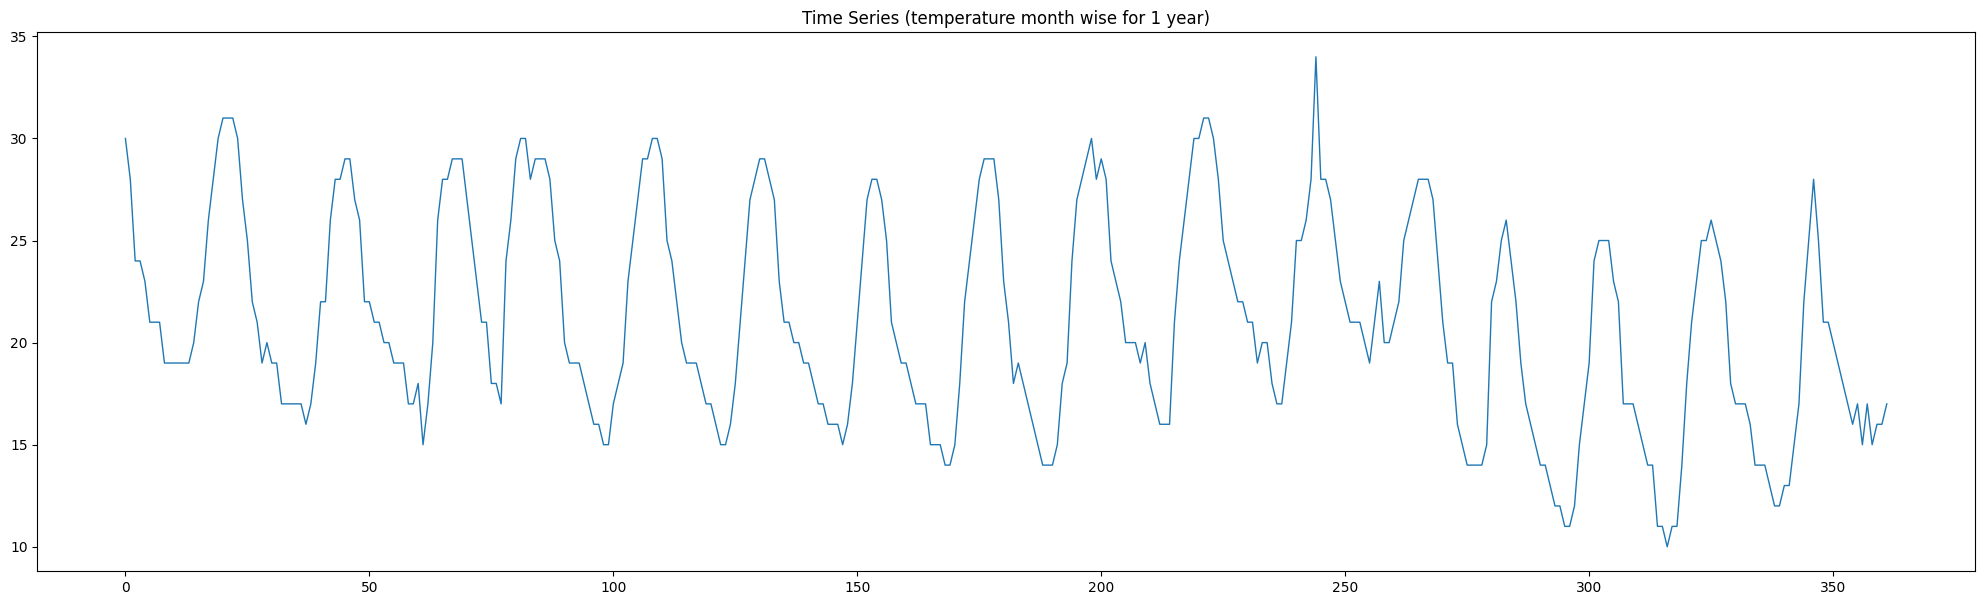

In [15]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (temperature month wise for 1 year)")
plt.show()

#### Scaling data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [17]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

In [18]:
data_scaled.shape

(362, 1)

In [19]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [20]:
out[:10]

[array([0.875]),
 array([0.875]),
 array([0.875]),
 array([0.83333333]),
 array([0.70833333]),
 array([0.625]),
 array([0.5]),
 array([0.45833333]),
 array([0.375]),
 array([0.41666667])]

reshape

In [21]:
import numpy as np

In [22]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [23]:
len(df)*0.65

235.3

In [24]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]
y_train = out[:237]
y_test= out[237:]

In [25]:
inp.shape

(342, 20, 1)

In [26]:
x_train.shape

(237, 20, 1)

In [27]:
x_test.shape

(105, 20, 1)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

### Model Building

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')







In [30]:
model.fit(x_train,y_train,epochs=300, verbose=1, )

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1956
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0770
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0645
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0510
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0519
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0498
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0500
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0450
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0440
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0417
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0388
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0363
Epoch 13/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0341
Epoch 14/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0270
Epoch 15/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0251
Epoch 16/300
8/8 ━━

In [31]:
# model.evaluate(x_test, y_test)

### Predictions and Model evaluation

Predictions on training set

In [32]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Predicted Value 0.7170196
Expected value 0.7083333333333334


Predictions on testing set

In [33]:
predictions=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [34]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.39525387
Expected Value 0.41666666666666663


In [35]:
predictions.shape

(105, 1)

In [36]:
y_test.shape

(105, 1)

In [37]:
pred_df=pd.DataFrame(predictions)

In [38]:
pred_df['TrueValues']=y_test

In [39]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [40]:
pred_df_new

,Predictions,TrueValues
0,0.437048,0.541667
1,0.543426,0.416667
2,0.395254,0.416667
3,0.403882,0.458333
4,0.479952,0.500000
...,...,...
100,0.223907,0.291667
101,0.269972,0.208333
102,0.224129,0.250000
103,0.262296,0.250000


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

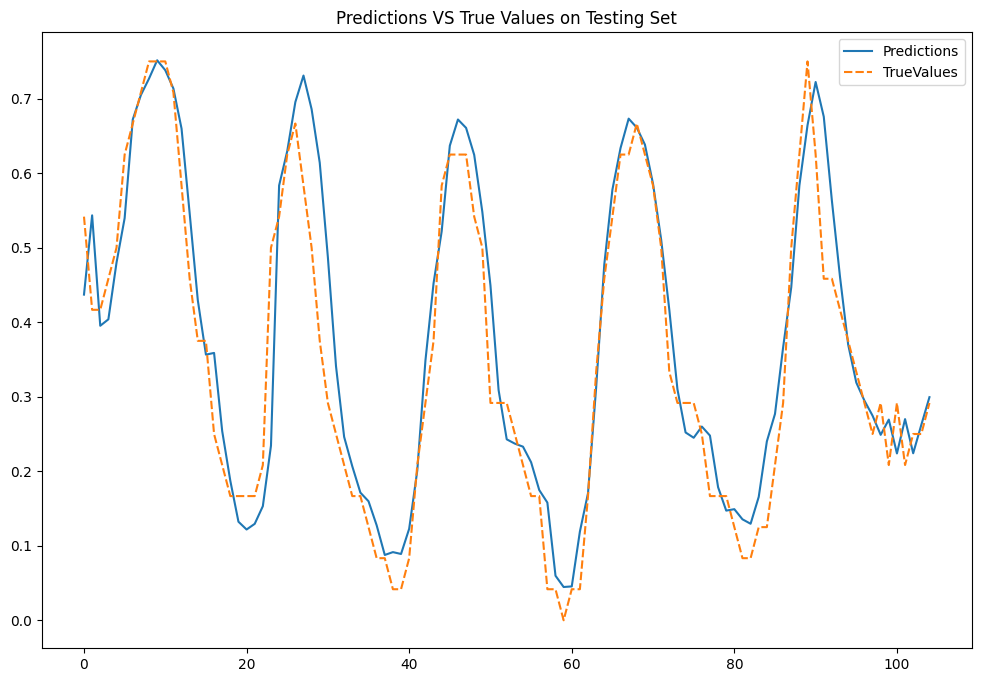

In [41]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

### Weather Predictions for next 30 Days

we are using last 10 days input for 1st day output

In [42]:
data_scaled.shape

(362, 1)

In [43]:
x_input=data_scaled[:20]

In [44]:
x_input.shape

(20, 1)

In [45]:
# now reshaping the data
x_input = x_input.reshape(1, -1)

In [46]:
x_input.shape

(1, 20)

In [47]:
# x_input = x_input.reshape((1, 20,1))
# yhat = model.predict(x_input, verbose=0)

In [48]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

creatitng a  functions which returns the next 30 days prediction

In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):

    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.8274441]
1 day input [0.75       0.58333333 0.58333333 0.54166667 0.45833333 0.45833333
 0.45833333 0.375      0.375      0.375      0.375      0.375
 0.375      0.41666667 0.5        0.54166667 0.66666667 0.75
 0.83333333 0.82744408]
1 day output [[0.8155191]]
2 day input [0.58333333 0.58333333 0.54166667 0.45833333 0.45833333 0.45833333
 0.375      0.375      0.375      0.375      0.375      0.375
 0.41666667 0.5        0.54166667 0.66666667 0.75       0.83333333
 0.82744408 0.81551909]
2 day output [[0.7770305]]
3 day input [0.58333333 0.54166667 0.45833333 0.45833333 0.45833333 0.375
 0.375      0.375      0.375      0.375      0.375      0.41666667
 0.5        0.54166667 0.66666667 0.75       0.83333333 0.82744408
 0.81551909 0.77703053]
3 day output [[0.7111127]]
4 day input [0.54166667 0.45833333 0.45833333 0.45833333 0.375      0.375
 0.375      0.375      0.375      0.375      0.41666667 0.5
 0.54166667 0.66666667 0.75       0.83333333 0.82744408 0.81551909
 0.77703053 0.71

In [50]:
day_new = np.arange(1,363)
day_pred = np.arange(363,393)

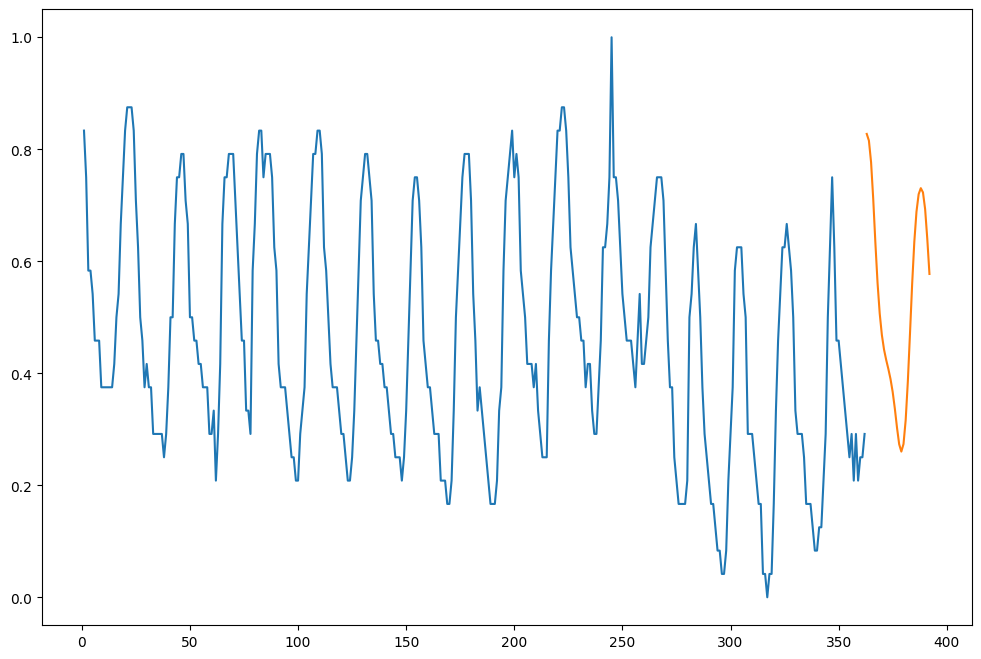

In [51]:
plt.figure(figsize=(12,8))
plt.plot(day_new,data_scaled)
plt.plot(day_pred,lst_output)

In [52]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

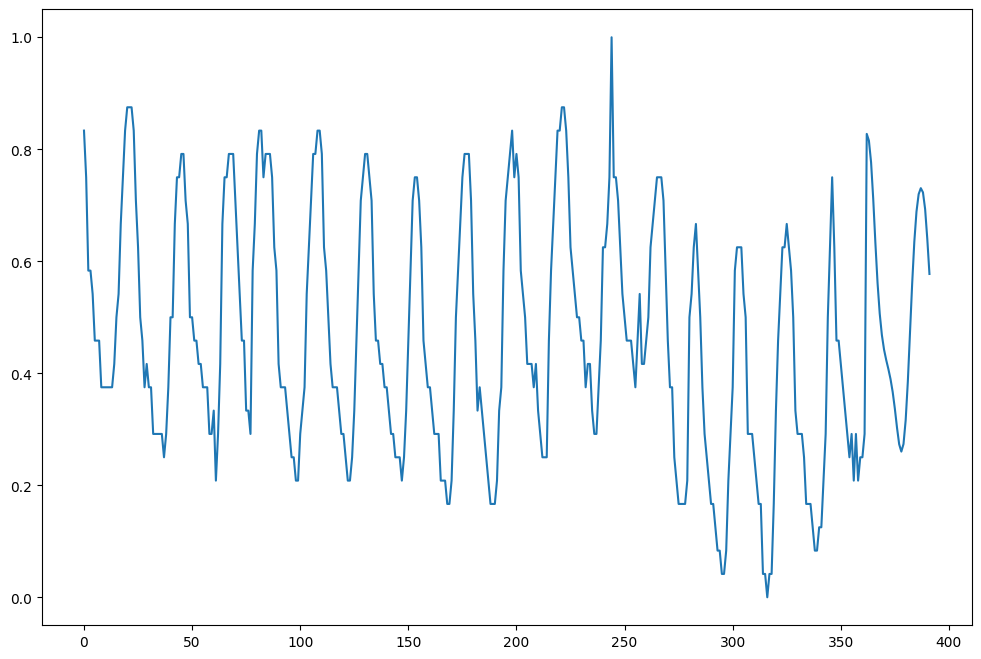

In [53]:
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)


Epoch 1/300


c:\Users\anujt_3nxzaxy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1860
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1860
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0660
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0660
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0625
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0625
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0517
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0517
Epoch 5/300
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0524
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0524
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0503
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0503
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0458
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0458
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0450
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1

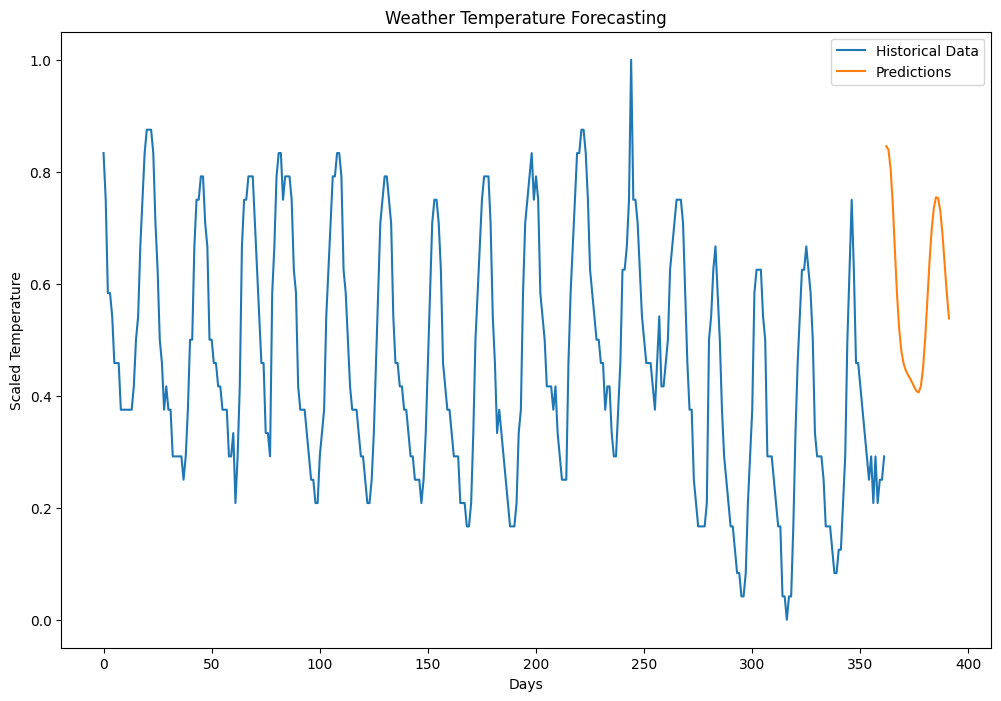

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load and prepare data
df = pd.read_csv('testset.csv')
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])
df = data[:365]  # Use 1 year of data
df = df.dropna(axis=0)
df = df['temp'].values
df = df.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

# Create sequences for LSTM
steps = 20
inp = []
out = []
for i in range(len(data_scaled) - steps):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

# Convert to numpy arrays
inp = np.array(inp)
out = np.array(out)

# Split into train and test sets
split = 237  # ~65% for training
x_train = inp[:split,:,:]
x_test = inp[split:,:,:]
y_train = out[:split]
y_test = out[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=300, verbose=1)

# Make predictions
predictions = model.predict(x_test)

# Future predictions (next 30 days)
x_input = data_scaled[:20]
temp_input = list(x_input.reshape(1, -1)[0])
lst_output = []
n_steps = 20

# Generate predictions for next 30 days
for i in range(30):
    if len(temp_input) > 20:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())

# Visualize results
plt.figure(figsize=(12,8))
plt.plot(data_scaled, label='Historical Data')
plt.plot([x for x in range(len(data_scaled), len(data_scaled) + len(lst_output))], 
         lst_output, label='Predictions')
plt.title('Weather Temperature Forecasting')
plt.xlabel('Days')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.show()